# 4. THỰC HÀNH
---
Sử dụng thuật toán Decision tree phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán Decision để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
 
* Sử dụng thuật toán Cây quyết định  trong 2 trường hợp:
    * Sử dụng độ đo Entropy: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    * Sử dụng độ đo Gini: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    
* Một mẫu rượu có các tham số như sau:
     * Alcohol				: 12.7	
     * Malic acid			: 3.05
     * Ash		    		: 1.88
     * Alcalinity of ash	: 28.8
     * Magnesium			: 101.1
     * Total phenols		: 2.88
     * Flavanoids			: 3.88
     * Nonflavanoid phenols	: 0.44
     * Proanthocyanins		: 2.88
     * Color intensity		: 8.8
     * Hue				    : 1.48
     * OD280/OD315 of diluted wines	: 3.88
     * Proline              :888
     
     Sử dụng model có độ chính xác cao nhất thu được ở yêu cầu 3, cho biết mẫu rượu này thuộc loại nào?

In [53]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}





In [54]:
#Đọc tập dữ liệu mẫu Wine data trong thư viện sklearn.
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df_wine = pd.DataFrame(data['data'], columns=data['feature_names'])
df_wine['target'] = data['target']
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [55]:
#Hiển thị 5 dòng đâu tiên của dữ liệu
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [56]:
#Phân tách Biến độc lập:
x_wine = df_wine.loc[:,['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']].values
x_wine


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [57]:
#Phân tách biến phụ thuộc:
y_wine = df_wine.loc[:,['target']].values.ravel()

y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [58]:
#Tách dữ liệu thành 2 phần Train - Test:
#Train - Test : 75 - 25
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_wine,
                                                    y_wine,
                                                    test_size = 0.25,
                                                    random_state = 42)
print('Số mẫu trong tập train:', x_train.shape)
print('Số mẫu trong tập test:', x_test.shape)

Số mẫu trong tập train: (133, 13)
Số mẫu trong tập test: (45, 13)


## Sử dụng độ đo gini

In [59]:
#Khai báo model phân lớp sử dụng cây quyết định:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Khai báo model Decision Tree sử dụng các tham số mặc định(Độ đo gini)
model_tree = DecisionTreeClassifier()

#Các tham số của model DecisionTree
print('DANH SÁC CÁC THAM SỐ CỦA MODEL:')
model_tree.get_params()


DANH SÁC CÁC THAM SỐ CỦA MODEL:


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [60]:
# Huấn luyện mô hình với dữ liệu huấn luyện
model_tree.fit(x_train, y_train)

print("Độ chính xác của tập huấn luyện:",round(model_tree.score(x_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 100.0


In [61]:
#Đặt tên cho các thuộc tính :
feature_names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
target_names = ['0: class_0', '1: class_1','2: class_2']

In [62]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


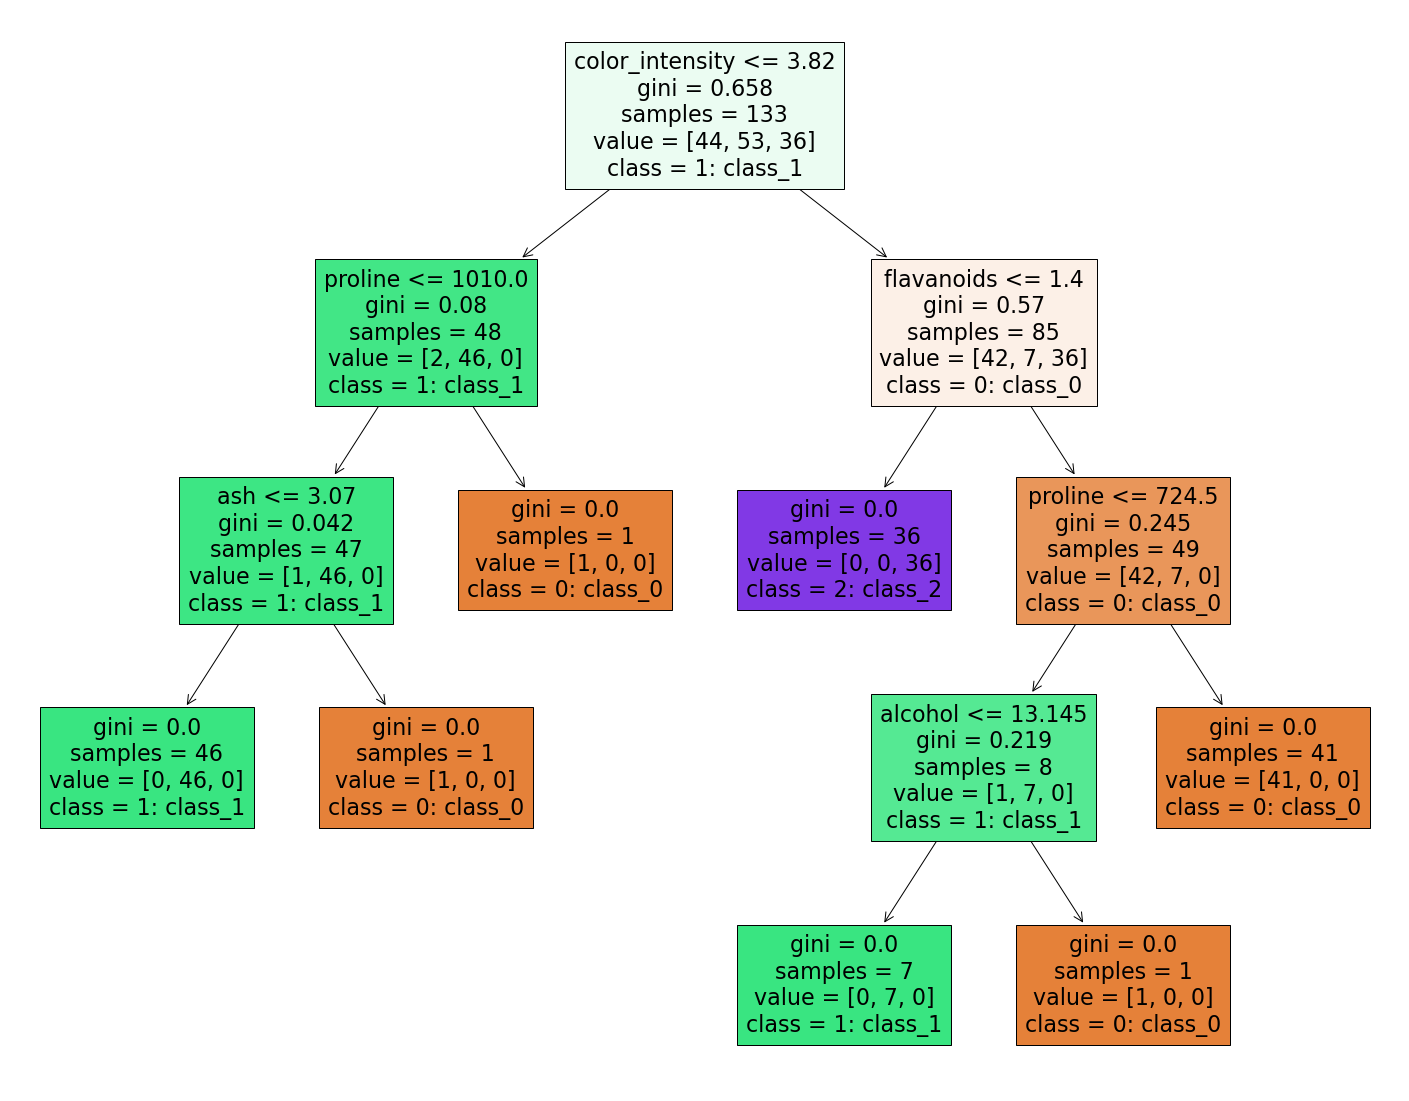

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

#Hiển thị cây quyết định
tree.plot_tree(model_tree, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0.01998197 0.         0.02235065 0.         0.         0.
 0.41589367 0.         0.         0.40331707 0.         0.
 0.13845664]


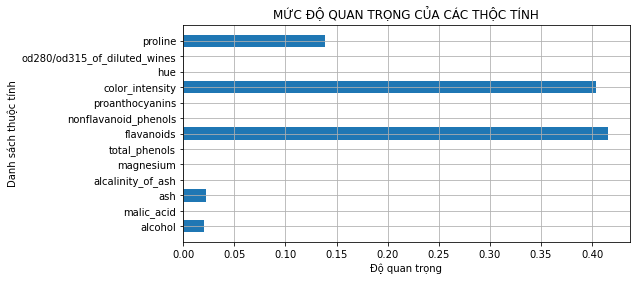

In [64]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(model_tree.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,model_tree.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [65]:
print(feature_names)
print(x_test[0])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
 1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]


In [66]:
x_test

array([[1.364000e+01, 3.100000e+00, 2.560000e+00, 1.520000e+01,
        1.160000e+02, 2.700000e+00, 3.030000e+00, 1.700000e-01,
        1.660000e+00, 5.100000e+00, 9.600000e-01, 3.360000e+00,
        8.450000e+02],
       [1.421000e+01, 4.040000e+00, 2.440000e+00, 1.890000e+01,
        1.110000e+02, 2.850000e+00, 2.650000e+00, 3.000000e-01,
        1.250000e+00, 5.240000e+00, 8.700000e-01, 3.330000e+00,
        1.080000e+03],
       [1.293000e+01, 2.810000e+00, 2.700000e+00, 2.100000e+01,
        9.600000e+01, 1.540000e+00, 5.000000e-01, 5.300000e-01,
        7.500000e-01, 4.600000e+00, 7.700000e-01, 2.310000e+00,
        6.000000e+02],
       [1.373000e+01, 1.500000e+00, 2.700000e+00, 2.250000e+01,
        1.010000e+02, 3.000000e+00, 3.250000e+00, 2.900000e-01,
        2.380000e+00, 5.700000e+00, 1.190000e+00, 2.710000e+00,
        1.285000e+03],
       [1.237000e+01, 1.170000e+00, 1.920000e+00, 1.960000e+01,
        7.800000e+01, 2.110000e+00, 2.000000e+00, 2.700000e-01,
        1.04

In [67]:
#Phân loại trên tập kiểm thử
y_pred = model_tree.predict(x_test)

print("Kết quả phân loại trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại trên tập dữ liệu TEST:
Predicted labels:  [0 0 2 0 1 0 1 2 1 2 1 0 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [68]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, normalize=True)
acc_num = accuracy_score(y_test, y_pred, normalize=False)

print("Độ chính xác đạt của model trên tập Test:", round(acc*100,2))
print("Tổng số mẫu dự đoán đúng:",acc_num, '/', len(y_test))

Độ chính xác đạt của model trên tập Test: 95.56
Tổng số mẫu dự đoán đúng: 43 / 45


## Sử dụng độ đo entropy

In [45]:
#Khai báo mô hình mới:
model_tree1  = DecisionTreeClassifier(criterion= 'entropy')

model_tree1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [46]:
# Huấn luyên mô hình mới với dữ liệu huấn luyện
model_tree1.fit(x_train, y_train)

print("Độ chính xác của tập huấn luyện:",round(model_tree1.score(x_train, y_train)*100,2))

Độ chính xác của tập huấn luyện: 100.0


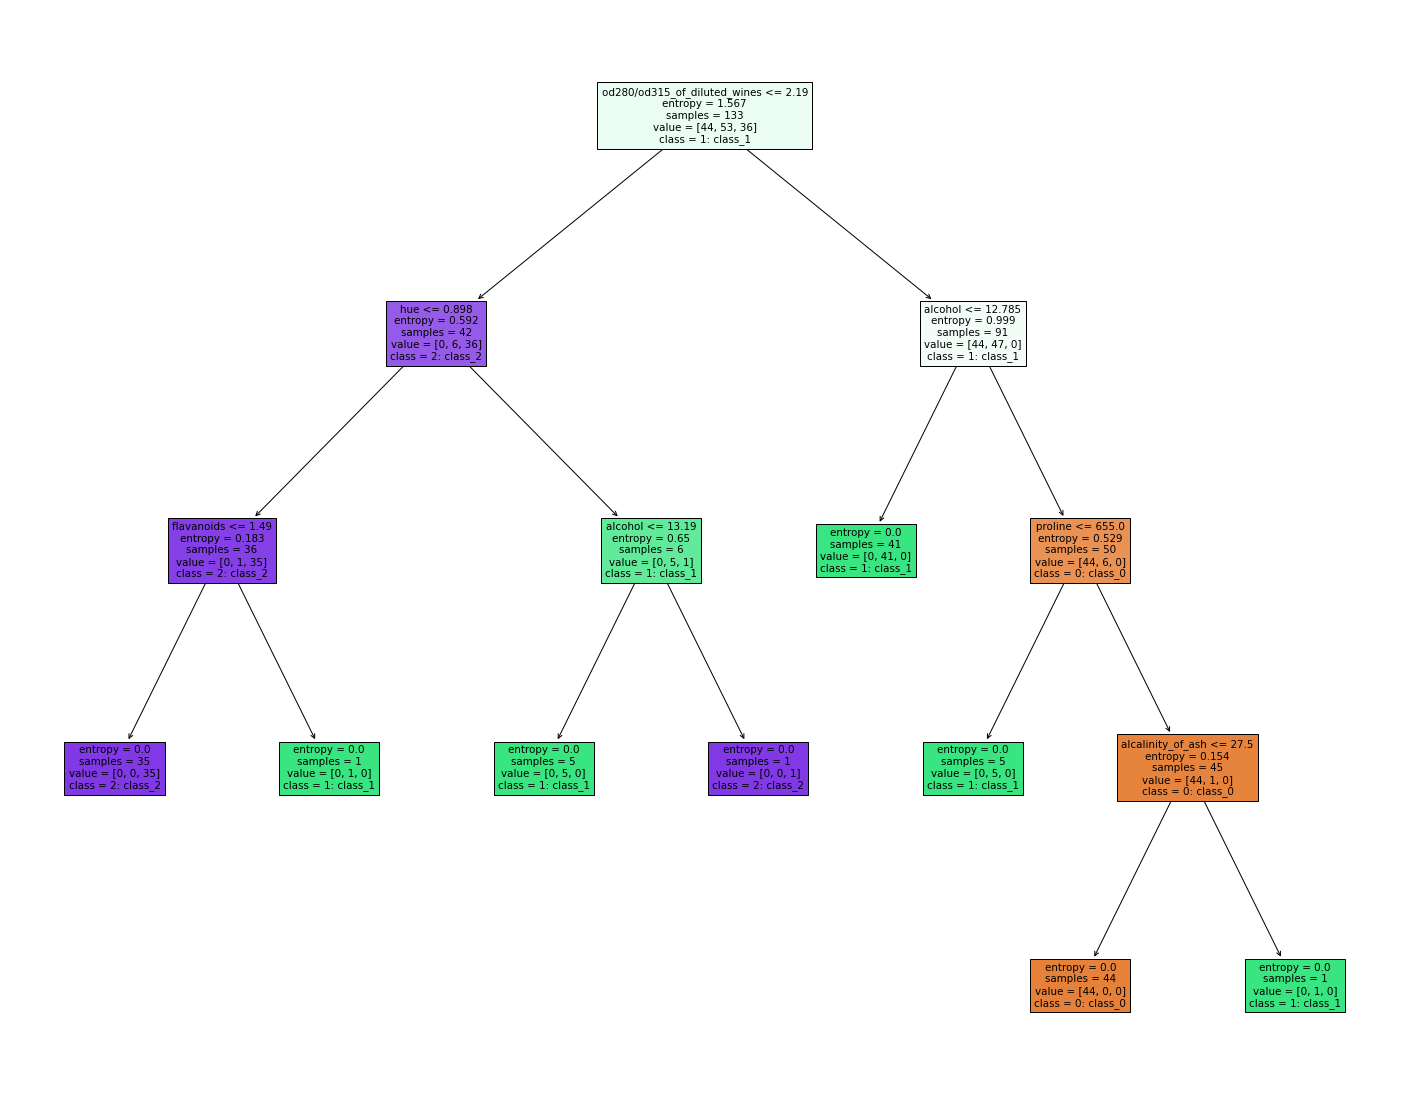

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

tree.plot_tree(model_tree1, 
                   feature_names=feature_names,  
                   class_names=target_names,
                   filled=True)
plt.show()

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0.32796285 0.         0.         0.03319124 0.         0.
 0.03162723 0.         0.         0.         0.06888166 0.44454697
 0.09379006]


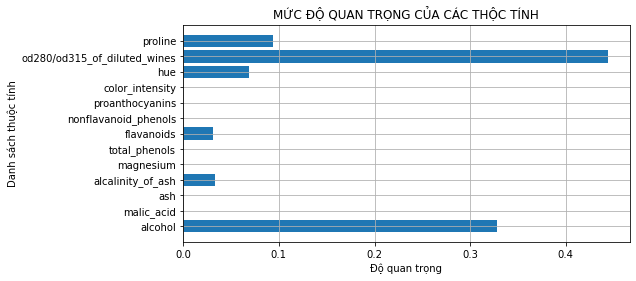

In [48]:
#Xác định mực độ quan trọng của các thuộc tính độc lập:
print(feature_names)
print(model_tree1.feature_importances_)

#Trực quan hóa
plt.figure(figsize=(8,4))
plt.barh(feature_names,model_tree1.feature_importances_)

plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Danh sách thuộc tính')
plt.xlabel('Độ quan trọng')
plt.grid(True)
plt.show()

In [49]:
#Phân loại hoa lan trên tập kiểm thử
y_pred1 = model_tree1.predict(x_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred1)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 1 2 1 0 0 1 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 2 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]


In [50]:
#Đánh giá độ chính xác:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred1)
acc1_num = accuracy_score(y_test, y_pred1, normalize=False)
print("Độ chính xác của mô hình trên tập TEST:", round(acc1*100,2), '%')
print("Tổng số mẫu dự đoán đúng:",acc1_num, '/', len(y_test))

Độ chính xác của mô hình trên tập TEST: 88.89 %
Tổng số mẫu dự đoán đúng: 40 / 45


## Sử dụng model Gini để dự đoán dữ liệu mới:

In [69]:
import numpy as np
X_new = np.array([(12.7,  3.05,  1.88, 28.8, 101.1, 2.88, 3.88, 0.44, 2.88, 8.8, 1.48, 3.88, 888)])

print('Thông số mẫu rượu mới:', X_new)

#Xác định lớp của rượu dựa vào các thông số này trên model đã huấn luyện
y_new = model_tree.predict(X_new)

print('---------------------------------------------')
print('MACHINE LEARNING dự đoán đây là rượu thuộc lớp:')
if y_new==0:
    print(target_names[0])
elif y_new==1:
    print(target_names[1])
else:
    print(target_names[2])

Thông số mẫu rượu mới: [[1.270e+01 3.050e+00 1.880e+00 2.880e+01 1.011e+02 2.880e+00 3.880e+00
  4.400e-01 2.880e+00 8.800e+00 1.480e+00 3.880e+00 8.880e+02]]
---------------------------------------------
MACHINE LEARNING dự đoán đây là rượu thuộc lớp:
0: class_0
